In [2]:
import os
# find current directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: c:\Users\hafez\AppData\Local\Programs\Microsoft VS Code


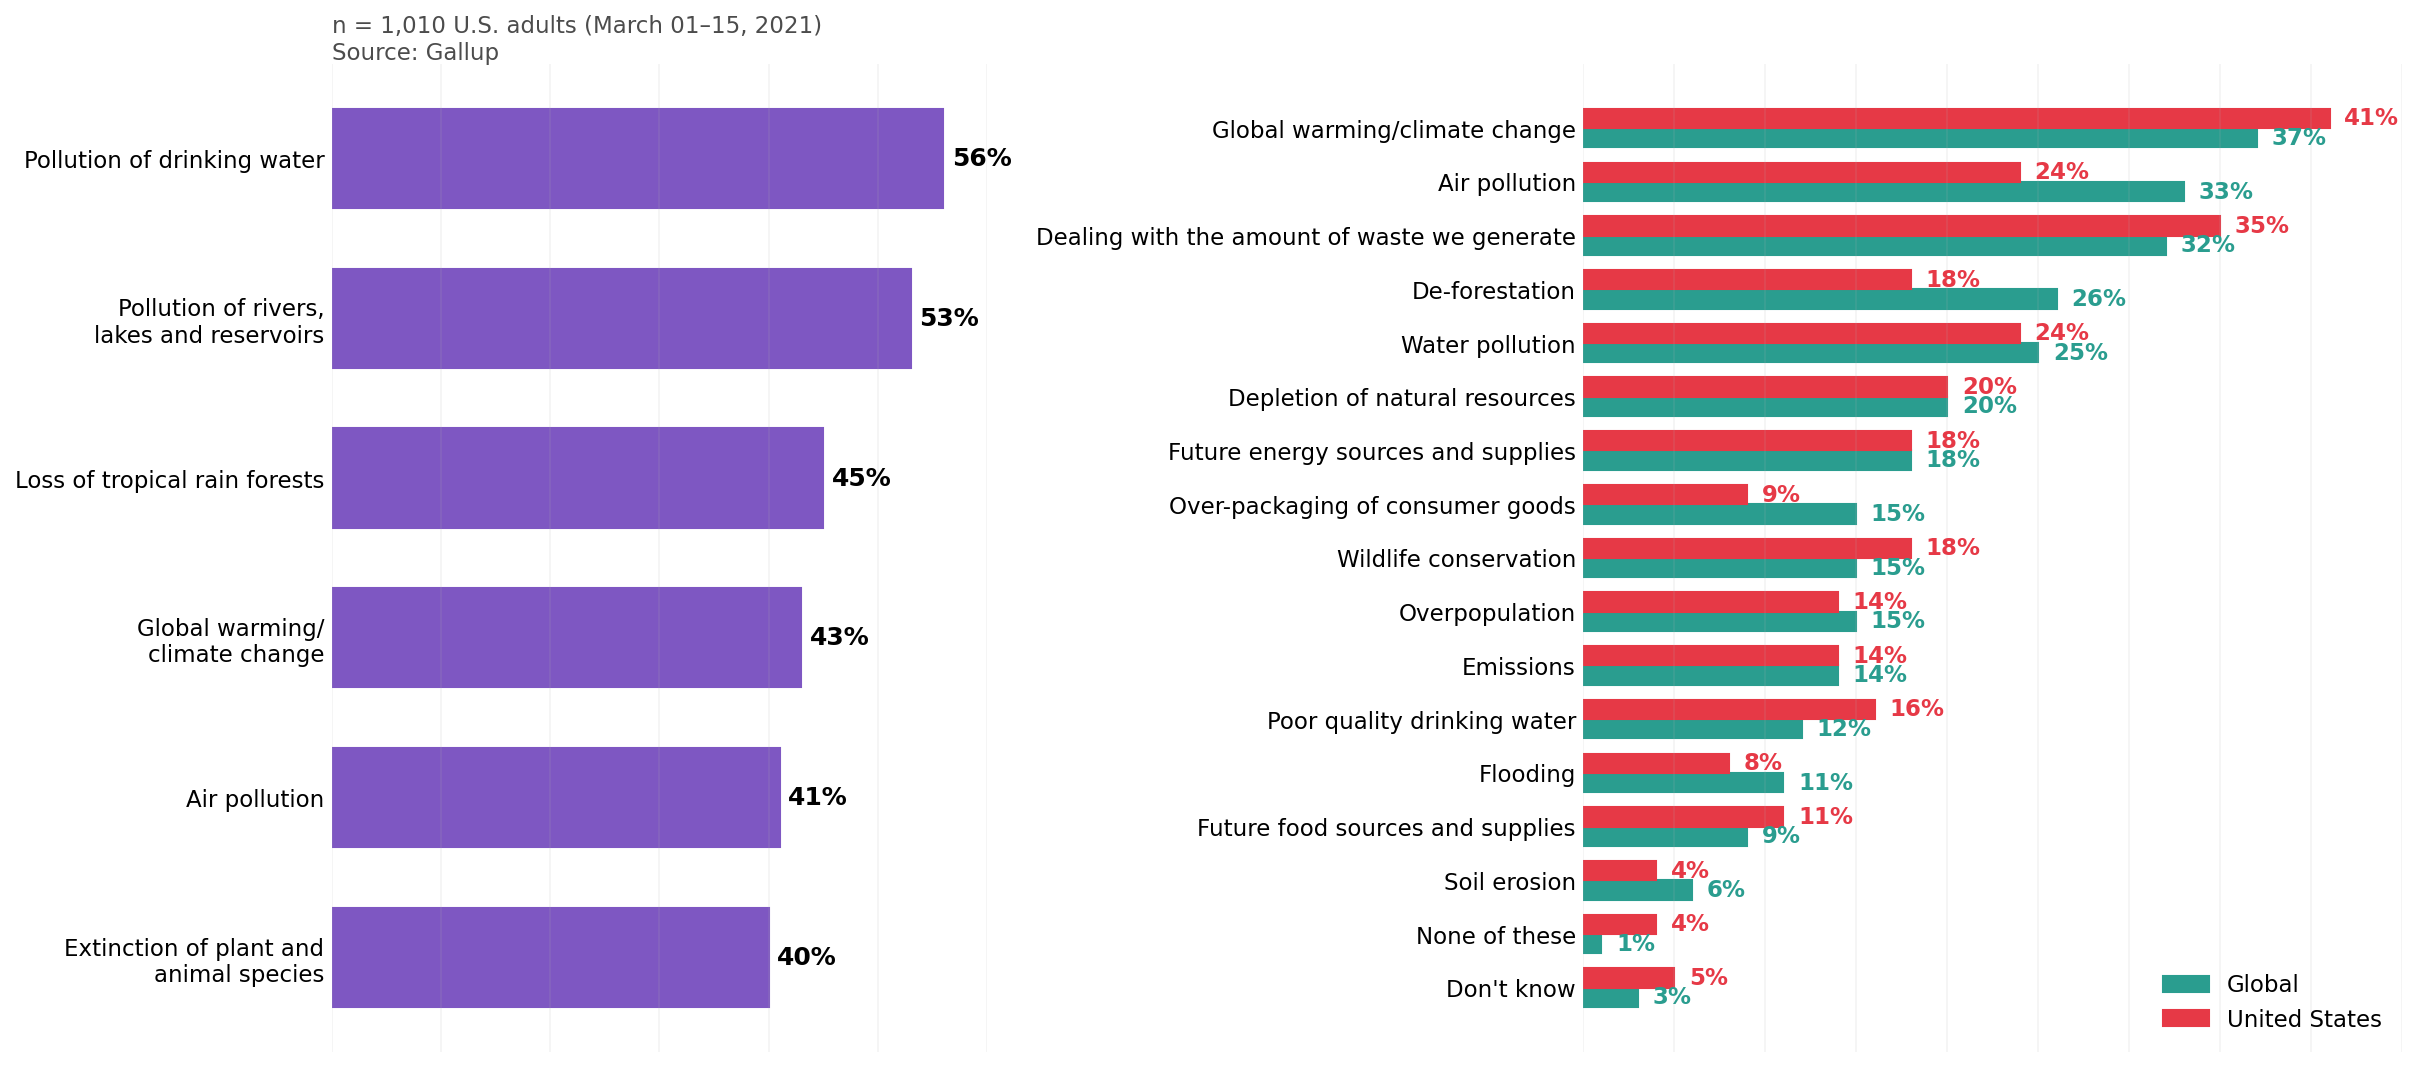

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data (from your figure)
# -----------------------------
left_labels = [
    "Pollution of drinking water",
    "Pollution of rivers,\nlakes and reservoirs",
    "Loss of tropical rain forests",
    "Global warming/\nclimate change",
    "Air pollution",
    "Extinction of plant and\nanimal species",
]
left_vals = np.array([56, 53, 45, 43, 41, 40])

right_labels = [
    "Global warming/climate change",
    "Air pollution",
    "Dealing with the amount of waste we generate",
    "De-forestation",
    "Water pollution",
    "Depletion of natural resources",
    "Future energy sources and supplies",
    "Over-packaging of consumer goods",
    "Wildlife conservation",
    "Overpopulation",
    "Emissions",
    "Poor quality drinking water",
    "Flooding",
    "Future food sources and supplies",
    "Soil erosion",
    "None of these",
    "Don't know",
]
global_vals = np.array([37, 33, 32, 26, 25, 20, 18, 15, 15, 15, 14, 12, 11, 9, 6, 1, 3])
us_vals     = np.array([41, 24, 35, 18, 24, 20, 18, 9, 18, 14, 14, 16, 8, 11, 4, 4, 5])

# -----------------------------
# Figure layout
# -----------------------------
plt.rcParams.update({
    "font.size": 11,
    "axes.titlesize": 18,
    "axes.titleweight": "bold",
    "axes.labelsize": 11,
    "figure.dpi": 150
})

fig = plt.figure(figsize=(16, 7), constrained_layout=True)
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.25])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# -----------------------------
# Left panel: U.S. top concerns
# -----------------------------
y1 = np.arange(len(left_labels))[::-1]  # top-to-bottom
bars1 = ax1.barh(y1, left_vals[::-1], height=0.62, edgecolor="none")
# add different colors for each bar
colors = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949"]
for bar, color in zip(bars1, colors):
    bar.set_color(color)

ax1.set_yticks(y1)
ax1.set_yticklabels(left_labels[::-1])
ax1.set_xlim(0, 60)
# invert y-axis to have the highest value on top
ax1.invert_yaxis()

# Clean styling
ax1.grid(axis="x", alpha=0.15)
for spine in ["top", "right", "left", "bottom"]:
    ax1.spines[spine].set_visible(False)
ax1.tick_params(axis="x", bottom=False, labelbottom=False)
ax1.tick_params(axis="y", length=0)

# Value labels
for b in bars1:
    w = b.get_width()
    ax1.text(w + 0.8, b.get_y() + b.get_height()/2, f"{int(w)}%",
             va="center", ha="left", fontsize=12, fontweight="bold")

# Footnote
ax1.text(0, -0.9, "n = 1,010 U.S. adults (March 01–15, 2021)\nSource: Gallup",
         ha="left", va="top", alpha=0.7)

# Set a nice single-color palette (purple)
for b in bars1:
    b.set_color("#7E57C2")  # purple

# -----------------------------
# Right panel: Global vs U.S.
# -----------------------------
y2 = np.arange(len(right_labels))[::-1]
h = 0.36
bars_g = ax2.barh(y2 + h/2, global_vals[::-1], height=h, label="Global", edgecolor="none")
bars_u = ax2.barh(y2 - h/2, us_vals[::-1],     height=h, label="United States", edgecolor="none")

ax2.set_yticks(y2)
ax2.set_yticklabels(right_labels[::-1])
ax2.set_xlim(0, 45)
# invert y-axis to have the highest value on top
ax2.invert_yaxis()

ax2.grid(axis="x", alpha=0.15)
for spine in ["top", "right", "left", "bottom"]:
    ax2.spines[spine].set_visible(False)
ax2.tick_params(axis="x", bottom=False, labelbottom=False)
ax2.tick_params(axis="y", length=0)

# Colors (teal vs red)
for b in bars_g:
    b.set_color("#2A9D8F")  # teal
for b in bars_u:
    b.set_color("#E63946")  # red

# Value labels (match bar color)
for b in bars_g:
    w = b.get_width()
    ax2.text(w + 0.8, b.get_y() + b.get_height()/2, f"{int(w)}%",
             va="center", ha="left", fontsize=11, fontweight="bold", color="#2A9D8F")

for b in bars_u:
    w = b.get_width()
    ax2.text(w + 0.8, b.get_y() + b.get_height()/2, f"{int(w)}%",
             va="center", ha="left", fontsize=11, fontweight="bold", color="#E63946")

ax2.legend(frameon=False, loc="lower right")

# -----------------------------
# Export
# -----------------------------
plt.savefig("environmental_concerns_side_by_side.png", dpi=300, bbox_inches="tight")
plt.show()
